## PCA cell observable
Apply two dimension PCA to segmentation results

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.covariance import EllipticEnvelope
import seaborn as sns
sns.set(style='ticks')

In [2]:
df = pd.read_csv('shewan_biofilm.csv')# change accordingly
df.head()

,Volume,Solidity,PrincipalAxisLength_1,PrincipalAxisLength_2,PrincipalAxisLength_3,PrincipalAxisLength_32ratio,OrientationVector_x,OrientationVector_y,OrientationVector_z,BoundingBox_x,BoundingBox_y,BoundingBox_z,BoundingBox_wx,BoundingBox_wy,BoundingBox_wz
0,208,0.784906,12.953777,6.026627,4.424581,0.734172,0.267038,-0.962246,0.052659,0.5,8.5,0.5,12,8,5
1,451,0.749169,17.834520,6.768599,6.105318,0.902006,0.975086,-0.218923,-0.035764,24.5,12.5,0.5,10,18,10
2,135,0.950704,6.512637,6.123165,5.300518,0.865650,-0.067817,-0.271184,0.960135,109.5,0.5,1.5,7,6,8
3,760,0.775510,21.725340,8.782485,6.458644,0.735401,-0.059285,0.064144,0.996178,52.5,2.5,1.5,23,8,12
4,179,0.978142,8.092908,5.962277,5.494640,0.921567,-0.733256,-0.388385,0.558115,62.5,6.5,1.5,8,9,7


In [3]:
df_pca = df.drop(columns=['PrincipalAxisLength_3','OrientationVector_x', 'OrientationVector_y','OrientationVector_z', 'BoundingBox_x', 'BoundingBox_y', 
                          'BoundingBox_z', 'BoundingBox_wx', 'BoundingBox_wy', 'BoundingBox_wz'])
df_pca = StandardScaler().fit_transform(df_pca)

In [4]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_pca)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [5]:
print(pca.explained_variance_ratio_)

[0.6909341  0.23250552]


In [6]:
principalDf['label'] = [i+1 for i in range(len(principalDf))]
principalDf

,principal component 1,principal component 2,label
0,0.759395,1.260712,1
1,1.534144,-0.633556,2
2,-1.387730,1.173572,3
3,3.954500,0.754786,4
4,-1.616259,0.510070,5
...,...,...,...
3203,3.430979,1.878086,3204
3204,1.669769,2.116993,3205
3205,-2.425237,-0.141481,3206
3206,-1.431862,0.201805,3207


C:\Users\GahlmannLab\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


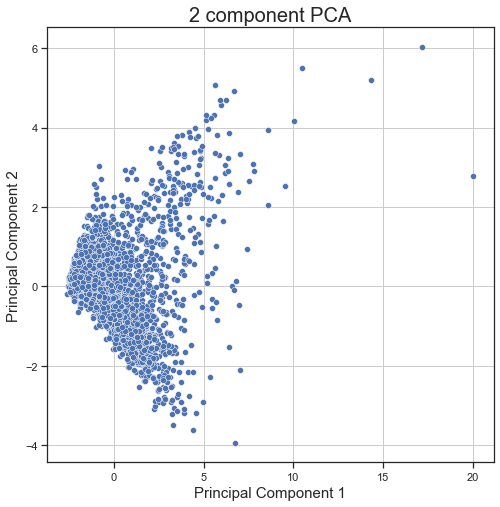

In [7]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
sns.scatterplot(principalDf['principal component 1'],principalDf['principal component 2'])

ax.grid()